# Project: TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Properties">General Properties about Data</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>

## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

want to find answer to this questions:

1- Which genre gets highest popularity in average?
<br>
2- Which genre gets highest revenue?
<br>
3- Which genre gets highest in average?
<br>
4- Who is the most director directed films?
<br>
5- What year did the largest number of films released? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
#plt.style.use('seaborn') #ggplot

<a id='Properties'></a>

## General Properties about Data

In [2]:
data = pd.read_csv('tmdb-movies.csv')

In [3]:
df = data.copy()

In [4]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### More information about a DataFrame and Columns Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# check the index
df.index

RangeIndex(start=0, stop=10866, step=1)

### Checking if columns have null values or not

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.nunique()   # Find number of unique values in all columns

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### There are columns have null values, So  --------->  I will drop it 

In [9]:
df.dropna(inplace=True)

### check agin to see null values

In [10]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Now I don't have null values

In [11]:
df.tail(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10657,5722,tt0065466,0.374514,0,0,Beyond the Valley of the Dolls,Dolly Read|Cynthia Myers|Marcia McBroom|John L...,http://www.beyondthevalleyofthedolls.com/home....,Russ Meyer,This Is Not A Sequel. There Has Never Been Any...,...,A hip and happenin' all girl rock group head t...,109,Comedy|Drama|Thriller,Twentieth Century Fox Film Corporation,7/17/70,19,6.2,1970,0.000000e+00,0.000000e+00
10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,...,A criminal organization has obtained two nucle...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.3,1965,7.612620e+07,9.771535e+08
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,"A psychotic murderer, institutionalized since ...",91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06
10819,16214,tt0077696,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,http://en.wikipedia.org/wiki/Hooper_(film),Hal Needham,The greatest stuntman alive!,...,Burt Reynolds plays a legendary stunt man know...,107,Action|Comedy,Warner Bros.,7/28/78,13,6.0,1978,0.000000e+00,2.607307e+08


### There are rows with columns (revenue) and  (budget) equal zero which not make true, So ---------> I drop there

In [12]:
df = df[df['revenue'] != 0]
df = df[df['budget'] != 0]
#df.dropna(inplace=True)

In [13]:
df.tail(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10489,6978,tt0090728,0.960984,25000000,11000000,Big Trouble in Little China,Kurt Russell|Kim Cattrall|Dennis Dun|James Hon...,http://www.theofficialjohncarpenter.com/big-tr...,John Carpenter,Adventure doesn't come any bigger!,...,When trucker Jack Burton agreed to take his fr...,99,Adventure|Fantasy|Action|Comedy,Twentieth Century Fox Film Corporation|TAFT En...,5/30/86,347,6.7,1986,4.973516e+07,2.188347e+07
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
10595,253,tt0070328,1.549139,7000000,161777836,Live and Let Die,Roger Moore|Yaphet Kotto|Jane Seymour|Clifton ...,http://www.mgm.com/view/movie/1130/Live-and-Le...,Guy Hamilton,Roger Moore is James Bond.,...,James Bond must investigate a mysterious murde...,121,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),7/5/73,293,6.1,1973,3.437812e+07,7.945168e+08
10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,...,A criminal organization has obtained two nucle...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.3,1965,7.612620e+07,9.771535e+08
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,"A psychotic murderer, institutionalized since ...",91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08


### Checking if columns (revenue) and (budget) equal zero are removed or not

In [14]:
df[df['revenue'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [15]:
df[df['budget'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [16]:
df.shape

(1287, 21)

In [17]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10595                    Adventure|Action|Thriller
10689                    Adventure|Action|Thriller
10724                    Adventure|Action|Thriller
10759                              Horror|Thriller
10760                                       Comedy
Name: genres, Length: 1287, dtype: object

### Found that each movie have different genre types with "|" between them which make analysis more diffecult
### So ---------> I will edit genres values which countains "|" and separate each one in specific row
### I get the code below from this website: 
https://riptutorial.com/pandas/example/25462/split--reshape--csv-strings-in-columns-into-multiple-rows--having-one-element-per-row

In [18]:
# Save new dataset in variable (New_df)

New_df = \
(df.set_index(df.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, df.columns]
)


### Check again after spriting genres values

In [19]:
New_df['genres']

0                Action
1             Adventure
2       Science Fiction
3              Thriller
4                Action
             ...       
3449             Action
3450           Thriller
3451             Horror
3452           Thriller
3453             Comedy
Name: genres, Length: 3454, dtype: object

In [20]:
New_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


## Now this data is ready for Analysis

In [21]:
#I want to number each plot so I will write function to return each plot number 
con = 0
def get_figure_no():
    global con
    con += 1
    return con

<a id='eda'></a>
## Exploratory Data Analysis

Text(0.5, 1.0, 'CORRELATION MATRIX')

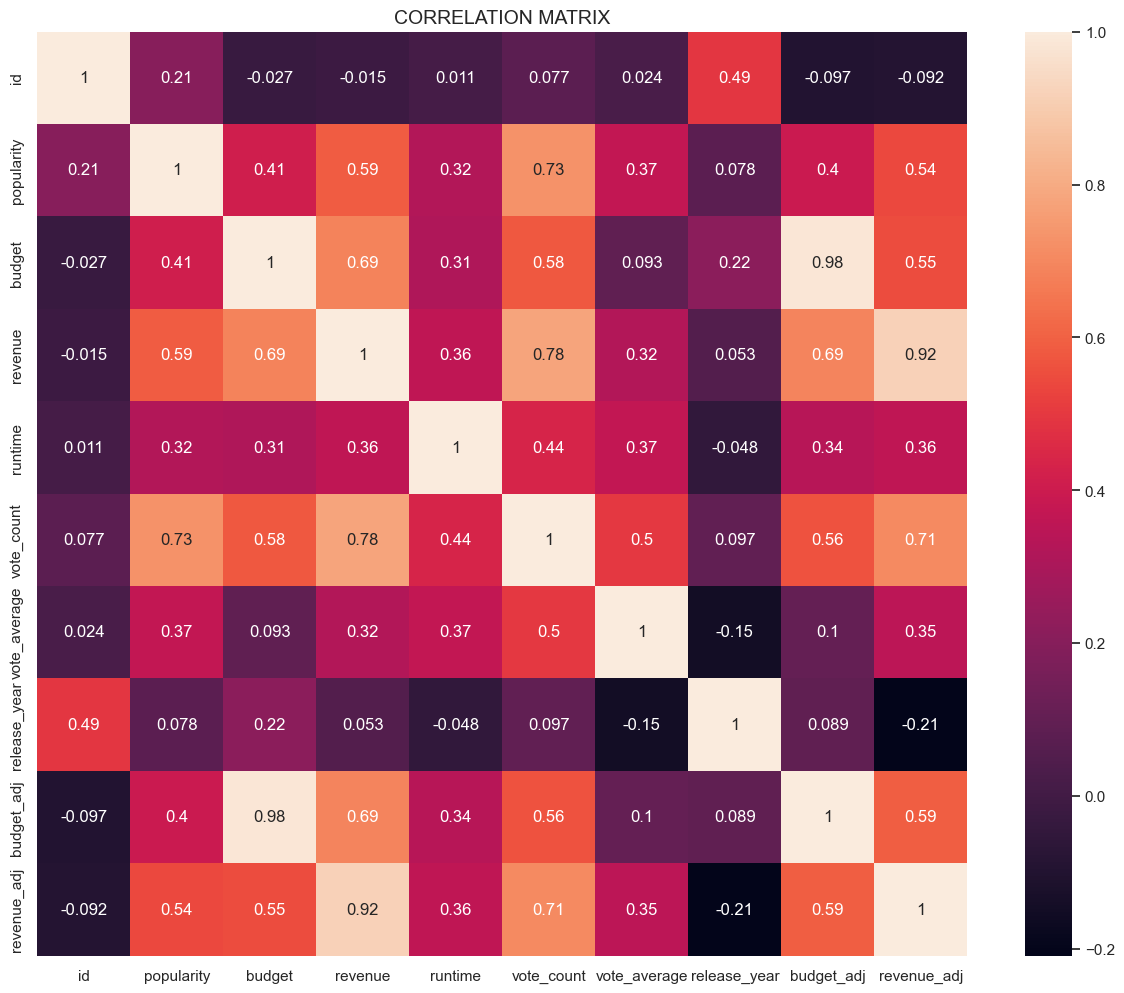

In [22]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(New_df.corr(), annot=True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

### Question 1 : Which genre gets highest popularity in average?

In [23]:
ge_popu = New_df.groupby('genres')['popularity'].mean() # clalculate average of popularity for each genre

In [24]:
ge_popu

genres
Action             2.482394
Adventure          3.017460
Animation          2.068166
Comedy             1.385712
Crime              1.563969
Documentary        0.363880
Drama              1.414404
Family             2.012103
Fantasy            2.600988
Foreign            0.216503
History            1.273964
Horror             1.168778
Music              1.309767
Mystery            1.827205
Romance            1.280101
Science Fiction    3.067299
Thriller           1.953044
War                1.813071
Western            2.510376
Name: popularity, dtype: float64

In [25]:
ge_popu.index[ge_popu.values.argmax()] # geting genre with highest popularity

'Science Fiction'

### To confirm this answer

Text(0, 0.5, 'Popularity in Average')

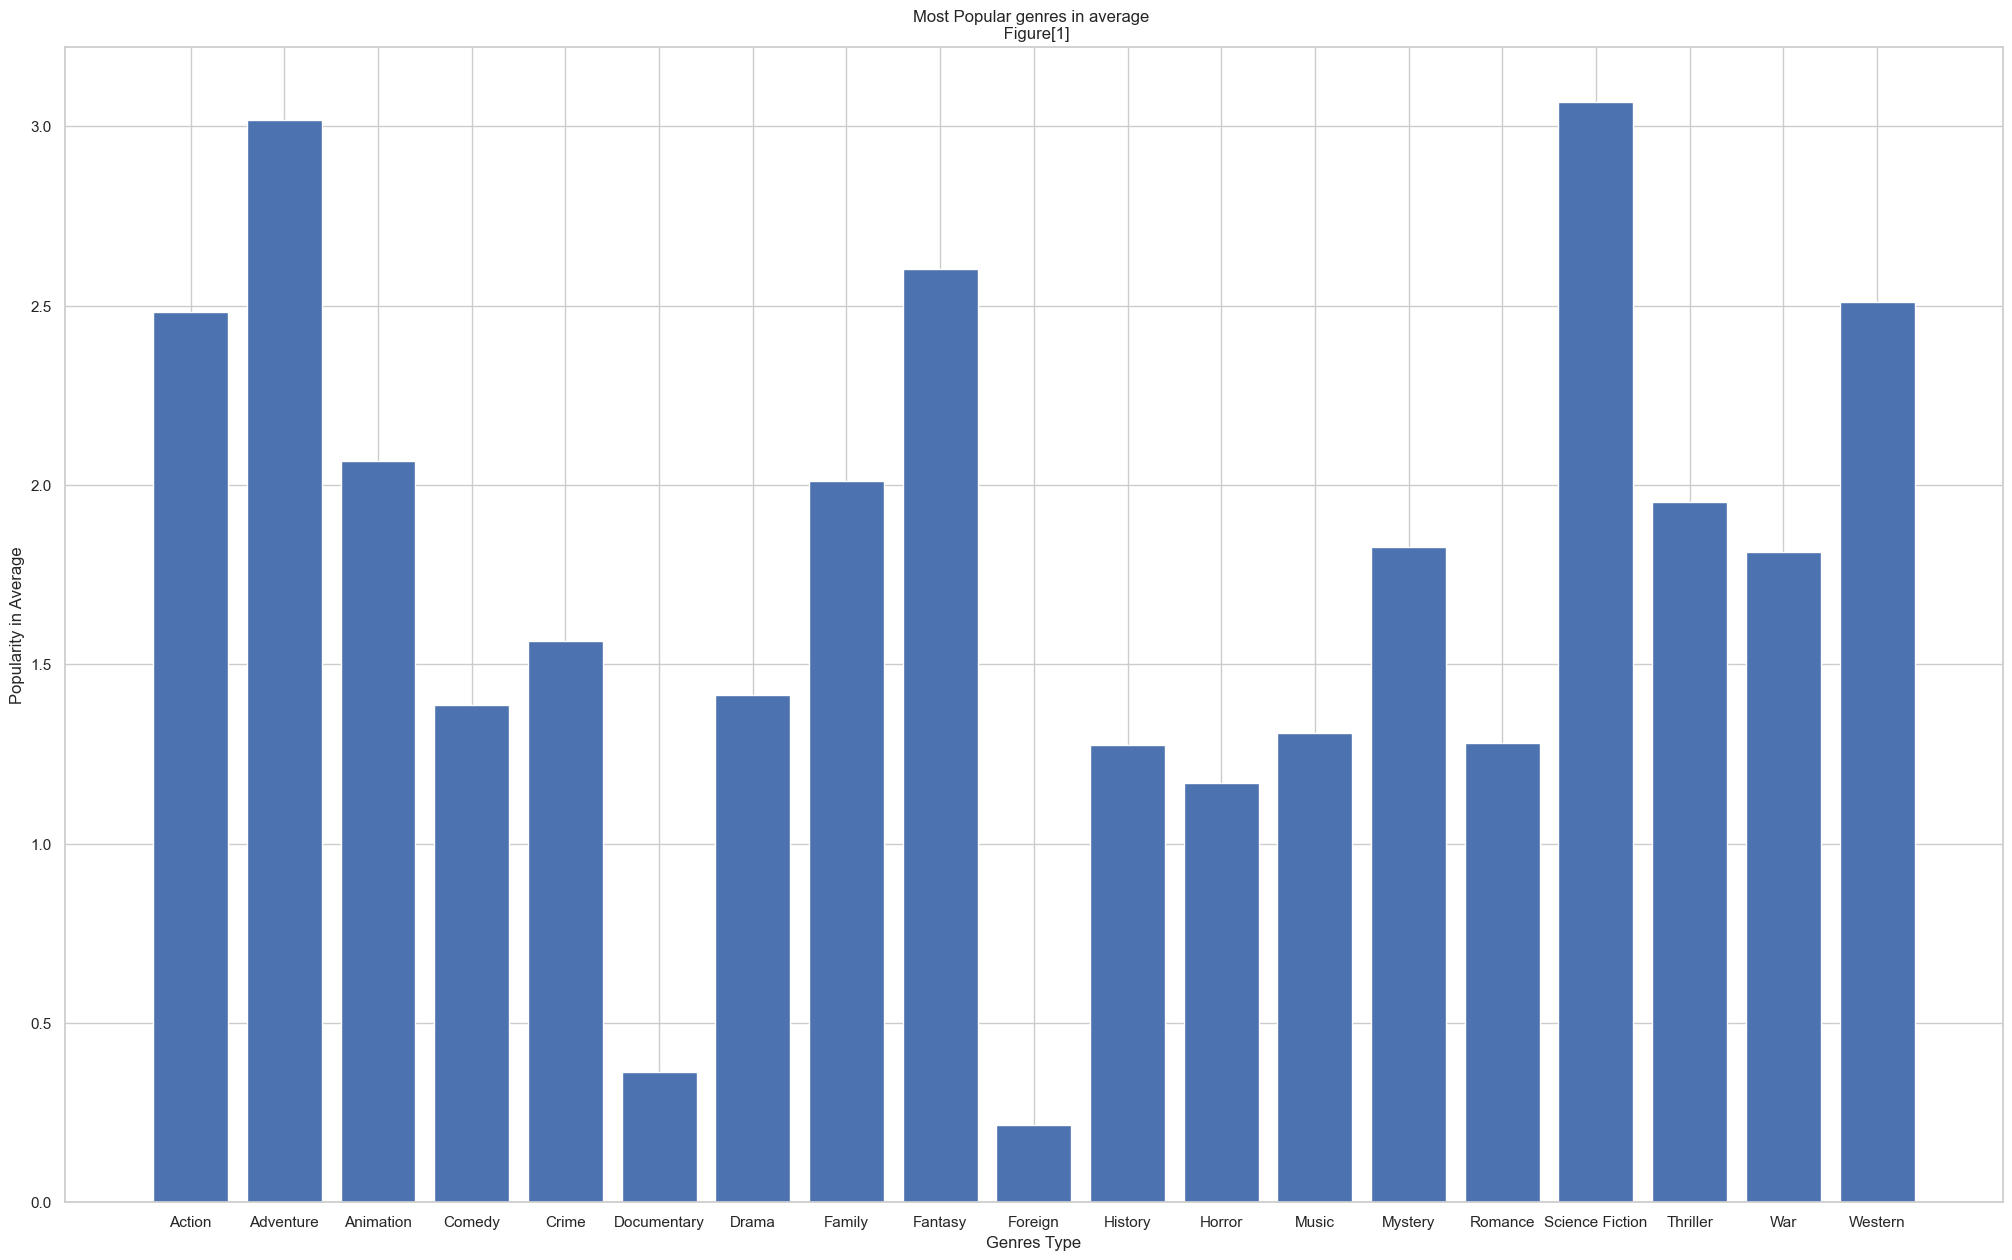

In [26]:
# representing value of popularity for each genre in bar chart 
plt.subplots(figsize=(25, 15))
plt.bar(ge_popu.index, ge_popu) # ge_popu.index represents genres while ge_popu represents value of popularity
plt.title('Most Popular genres in average \n Figure[{}]'.format(get_figure_no()))
plt.xlabel('Genres Type')
plt.ylabel('Popularity in Average')

### The previous bar chart in figure [1] represents genres with popularity 
## 'science fiction' is the most popular genre

###  Question 2 : Which genre gets highest revenue ?

In [27]:
genres_with_revenue = New_df.groupby(['genres']).sum().reset_index() #summing revenue of each genre

In [28]:
genres_with_revenue

,genres,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action,19286180,1030.193551,32328042656,106422933662,47390,599847,2571.1,832499,3.399547e+10,1.218697e+11
1,Adventure,13726905,896.185658,29697950034,111323378605,34524,515147,1884.8,595555,3.112044e+10,1.291628e+11
2,Animation,5177109,223.361976,10262600000,37615472747,9987,136342,693.1,216868,1.056230e+10,3.938591e+10
3,Comedy,20278851,573.684939,18893693619,60892842731,42419,285270,2531.1,831109,1.974328e+10,6.553855e+10
4,Crime,10551188,301.845987,8348143247,22937943439,22084,167699,1228.8,387460,8.638194e+09,2.477058e+10
5,Documentary,544711,5.458199,93393148,390488027,1496,1204,99.3,30127,9.679849e+07,4.058910e+08
6,Drama,30298594,756.705925,18247415572,55599344696,61848,378163,3480.1,1074092,1.933823e+10,6.235144e+10
7,Family,6545642,327.972866,14659000000,52978880235,16134,193035,1022.0,327080,1.528508e+10,5.787264e+10
8,Fantasy,6409160,400.552196,16037550003,58443962906,17531,248406,962.5,309126,1.651988e+10,6.223513e+10
9,Foreign,46689,0.216503,1500000,187716,90,23,7.8,2010,1.500000e+06,1.877160e+05


In [29]:
genres_with_revenue['revenue'].max()

111323378605

In [30]:
genres_with_revenue[genres_with_revenue['revenue'] == 111323378605]

,genres,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,Adventure,13726905,896.185658,29697950034,111323378605,34524,515147,1884.8,595555,3.112044e+10,1.291628e+11


### To confirm this answer

Text(0, 0.5, 'revenue')

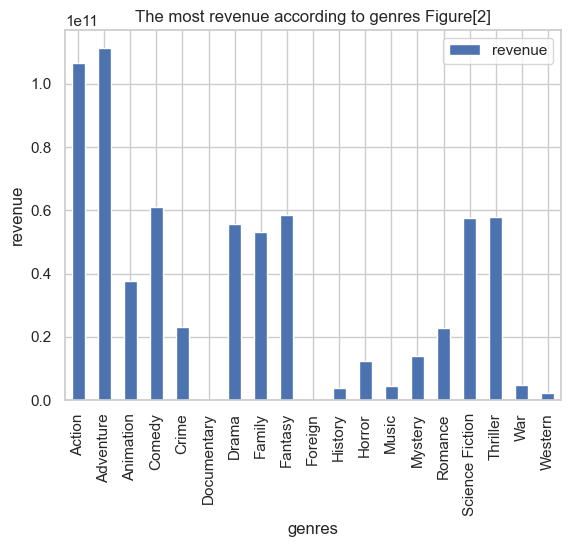

In [43]:
# drawing bar chart to represent each genre revenue
ax = genres_with_revenue.plot(title='The most revenue according to genres Figure[{}]'.format(get_figure_no()), kind='bar', x='genres', y='revenue')
ax.set_xlabel('genres')
ax.set_ylabel('revenue')

### The previous plot in figure [2] represents genres with revenue
## 'Adventure' gets the highest revenue

### Question 3: Which genre gets highest revenue in average?

In [32]:
rev_ge = New_df.groupby(['genres']).mean()['revenue'] # calculating each genre revenue in average 

In [33]:
rev_ge

genres
Action             2.564408e+08
Adventure          3.748262e+08
Animation          3.482914e+08
Comedy             1.470842e+08
Crime              1.188494e+08
Documentary        2.603254e+07
Drama              1.039240e+08
Family             3.250238e+08
Fantasy            3.795063e+08
Foreign            1.877160e+05
History            1.039381e+08
Horror             8.935336e+07
Music              1.181586e+08
Mystery            1.421534e+08
Romance            1.169111e+08
Science Fiction    2.751587e+08
Thriller           1.446965e+08
War                1.437027e+08
Western            1.714537e+08
Name: revenue, dtype: float64

In [34]:
New_df.groupby(['genres']).mean()['revenue'].idxmax()

'Fantasy'

### To confirm this answer

Text(0, 0.5, 'Increase in Average Of Revenue')

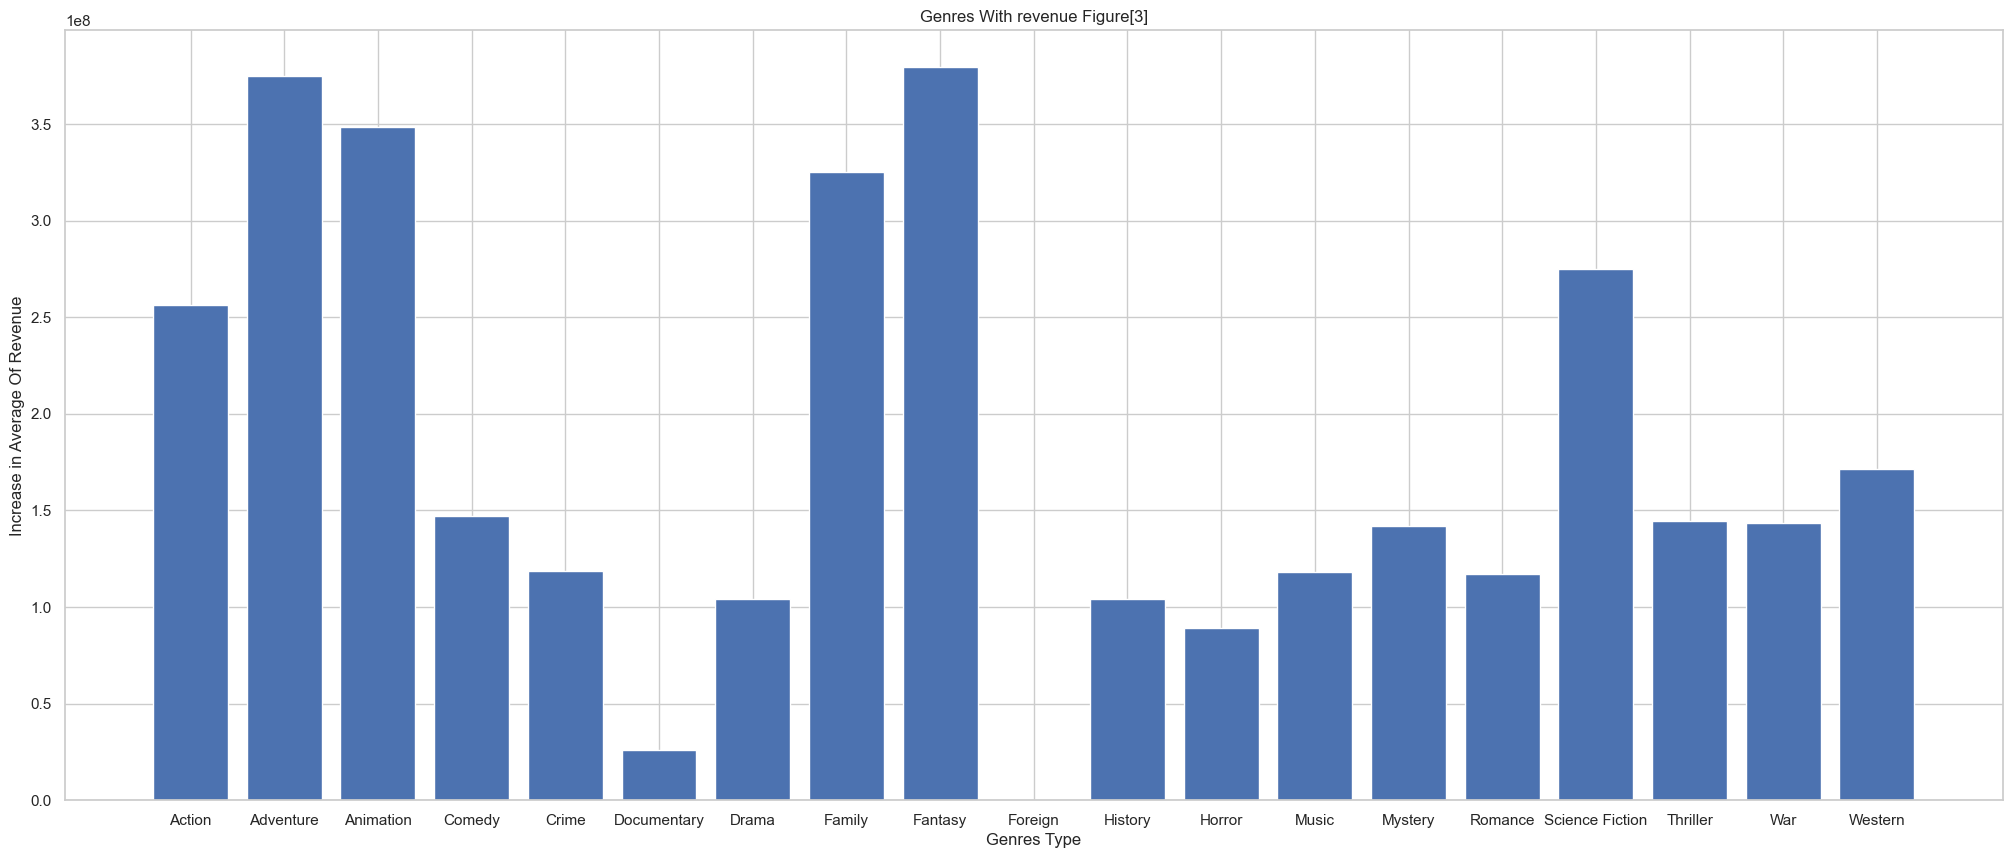

In [45]:
# represent each genre revenue in a bar chart
plt.subplots(figsize=(25, 10))
plt.bar(rev_ge.index,rev_ge)
plt.title('Genres With revenue Figure[{}]'.format(get_figure_no()))
plt.xlabel('Genres Type')
plt.ylabel('Increase in Average Of Revenue')

### The previous plot in figure [3] represents genres with average ofrevenue
## 'Fantasy' gets the highest revenue in average

### Question 4: Who is the most director directed films?

In [36]:
dire = New_df['director'].value_counts()

In [37]:
dire

John Carpenter         37
Steven Spielberg       29
Robert Zemeckis        28
Steven Soderbergh      25
Ridley Scott           24
                       ..
John R. Leonetti        1
Juan Antonio Bayona     1
Curtis Hanson           1
Rodrigo GarcÃ­a         1
John Landis             1
Name: director, Length: 789, dtype: int64

In [38]:
dire.idxmax()

'John Carpenter'

## 'John Carpenter' is the director who directed the most films

### Question 5 : What year did the largest number of films released?

In [39]:
re = New_df['release_year'].value_counts()   #  get number of all values in column 'release_year'

In [40]:
re

2011    398
2010    348
2009    310
2015    252
2007    247
2012    238
2008    213
2013    184
2006    184
2014    182
2005    136
2004    120
2003     73
2002     69
1999     53
2001     50
1996     44
2000     35
1995     25
1998     23
1997     22
1993     19
1992     18
1983     16
1981     16
1984     15
1990     14
1989     13
1979     12
1971     12
1994     11
1982     11
1975     10
1987      9
1988      8
1991      7
1985      7
1977      6
1973      6
1964      5
1980      4
1986      4
1969      3
1965      3
1963      3
1978      3
1967      3
1962      3
1974      3
1961      2
1972      2
Name: release_year, dtype: int64

In [41]:
New_df['release_year'].value_counts().idxmax() # geting the largest year which has the largest number of movies 

2011

### To confirm this answer

Text(0, 0.5, 'Number of films')

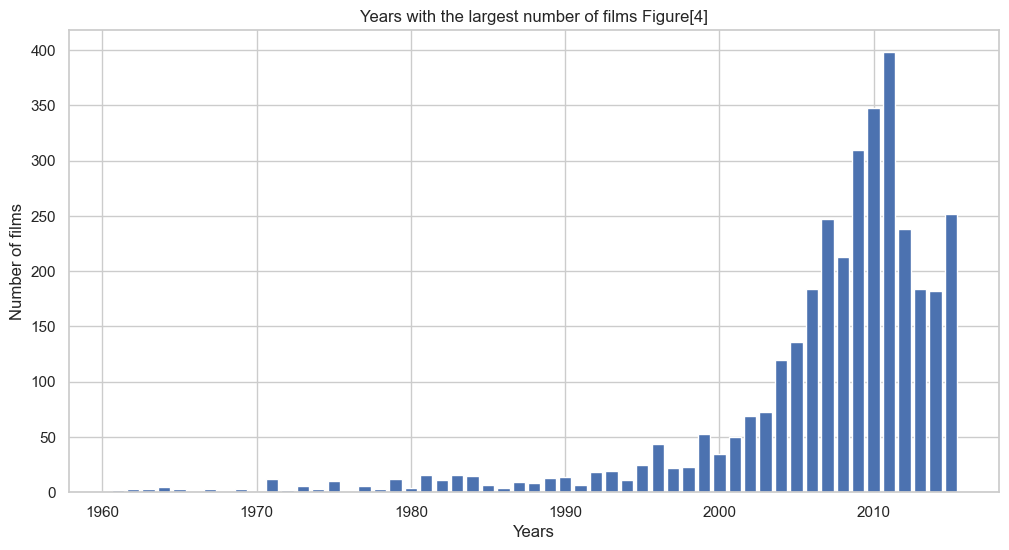

In [47]:
# representing Years with the largest number of films take place
plt.subplots(figsize=(12, 6))
plt.bar(re.index, re)
plt.title('Years with the largest number of films Figure[{}]'.format(get_figure_no()))
plt.xlabel('Years')
plt.ylabel('Number of films')

### The previous plot in figure [4] represents years with the largest number of films
## '2011' have largest number of films released

<a id='conclusions'></a>
## Conclusion

#### 1- Genre gets highest popularity in average is 'Science Fiction'

#### 2- Genre which gets highest revenue is 'Adventure'

#### 3- Genre which gets highest revenue in average is 'Fantasy'

#### 4- 'John Carpenter' is the director who directed the most films

#### 5- '2011' have largest number of movie released

## limitations:
1- I found null values in a dataset so I drop it to make analysis more accurate.
<br>
2- There are zero values in budget and revenue columns which does not make true so remove rows with revenue or budget equal zero.
<br>
3- I found that each movie have different genre types with "|" between them which make analysis more diffecult because I want to deal with each genre type sperately so I Edit genres values which countains "|" and separate each one in specific row.
<br>

<a id='references'></a>

## References: 
[1] https://riptutorial.com/pandas/example/25462/split--reshape--csv-strings-in-columns-into-multiple-rows--having-one-element-per-row
<br>
[3] https://numpy.org/doc/stable/reference/generated/numpy.argmax.html